In [1]:
# Connor Lewis
# Michael Spearing
# Due: February 7, 2017 17:00

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.linalg import orth
import sympy

In [2]:
# Problem 1: Linear Algebra in Python
v1 = np.array([1,2,3,4])
v2 = np.array([0,1,0,1])
v3 = np.array([1,4,3,6])
v4 = np.array([2,11,6,15])

#https://docs.scipy.org/doc/numpy/reference/generated/numpy.vstack.html
matrix = np.vstack((v1,v2,v3,v4))
print("Origional Matrix: \n" + str(matrix))

#http://docs.sympy.org/dev/tutorial/matrices.html
reduce = sympy.Matrix(matrix).rref()
print("RREF form: \n" + str(reduce))

Origional Matrix: 
[[ 1  2  3  4]
 [ 0  1  0  1]
 [ 1  4  3  6]
 [ 2 11  6 15]]
RREF form: 
(Matrix([
[1, 0, 3, 2],
[0, 1, 0, 1],
[0, 0, 0, 0],
[0, 0, 0, 0]]), [0, 1])


In [6]:
# Problem 1: Linear Algebra in Python - Question 1
in_s = np.array([1,1,3,3])
matrix2 = np.vstack((matrix,in_s))
reduce2 = sympy.Matrix(matrix2).rref()
print(str(in_s) + " is in the span of S")

print("RREF of matrix and new vector in S: \n" + str(reduce2))

not_in_s = np.array([1,0,5,2])
matrix3 = np.vstack((matrix, not_in_s))
reduce3 = sympy.Matrix(matrix3).rref()
print(str(not_in_s) + " is not in the span of S")
print("RREF of matrix and new vector not in S: \n" + str(reduce3))
# To check if a vector is in S, we concatenate the vector onto the matrix
# and reduce the matrix. If it is the same as the origional matrix reduced
# then it is in the span of S. Otherwise, it is outsie.


[1 1 3 3] is in the span of S
RREF of matrix and new vector in S: 
(Matrix([
[1, 0, 3, 2],
[0, 1, 0, 1],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]]), [0, 1])
[1 0 5 2] is not in the span of S
RREF of matrix and new vector not in S: 
(Matrix([
[1, 0, 0, 2],
[0, 1, 0, 1],
[0, 0, 1, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]]), [0, 1, 2])


In [7]:
# Problem 1: Linear Algebra in Python - Question 2
print("The Dimension of the Subspace S is: " + str(np.linalg.matrix_rank(matrix)))

The Dimension of the Subspace S is: 2


In [10]:
# Problem 1: Linear Algebra in Python - Question 3
print("An orthonormal basis of for the span of S is: \n" + str(orth(matrix)))

An orthonormal basis of for the span of S is: 
[[-0.24011927  0.8581727 ]
 [-0.05990306 -0.29094143]
 [-0.35992538  0.27628983]
 [-0.89955994 -0.32024463]]


In [13]:
# Problem 1: Linear Algebra in Python - Question 4
z = np.array([1,0,0,0])
matrix4 = np.vstack((v1,v2)).transpose()

matrix5 = (matrix4.transpose().dot(matrix4))

matrix6 = matrix5.dot(matrix4.transpose())

minx_s = matrix6[:, 0]

print(minx_s)


[30  6]


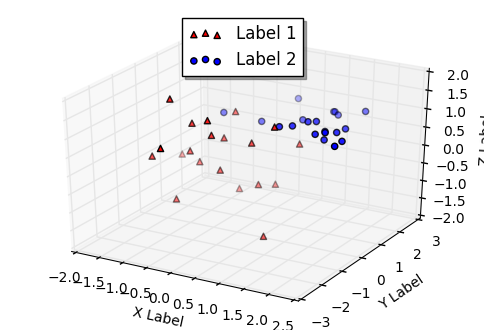

In [21]:
# Problem 2: PCA - Question 1
mean1 = [0,0,0]
n = 20
d = 3
cov_Matrix1 = [[0.5,0,0],[0,0.5,0],[0,0,0.7]]
mean2 = [1,1,1]
cov_Matrix2 = [[0.5,0,0],[0,0.5,0],[0,0,0.01]]

data1 = np.random.multivariate_normal(mean1, cov_Matrix1, n)
data2 = np.random.multivariate_normal(mean2, cov_Matrix2, n)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data1[:,0], data1[:,1], data1[:,2], c='r', marker='^', label="Label 1")
ax.scatter(data2[:,0], data2[:,1], data2[:,2], c='b', marker='o', label="Label 2")
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
legend = ax.legend(loc='upper center', shadow=True)
plt.show()

In [82]:
# Problem 2: PCA - Question 3
data_Agg = np.vstack((data1,data2))

#cov = data_Agg.transpose().dot(data_Agg)

mean = [None] *3
mean[0] = data_Agg[0].mean()
mean[1] = data_Agg[1].mean()
mean[2] = data_Agg[2].mean()

cov = np.zeros((3,3))
for x in range(3):
    for y in range(3):
        for i in range(40):
            cov[x,y] += (data_Agg[i][x] - mean[x]) * (data_Agg[i][y] - mean[y])
        cov[x][y] = cov[x][y] / 39
print(cov)
cov = np.cov(data_Agg, rowvar=False)
print(cov)
### ADD in the COVARIANCE CALCULATION


[[ 1.18137103  0.34927561  0.64816669]
 [ 0.34927561  0.96668788 -0.10887705]
 [ 0.64816669 -0.10887705  1.39760001]]
[[ 0.98723952  0.48295148  0.24430735]
 [ 0.48295148  0.87464079  0.1692141 ]
 [ 0.24430735  0.1692141   0.55743567]]


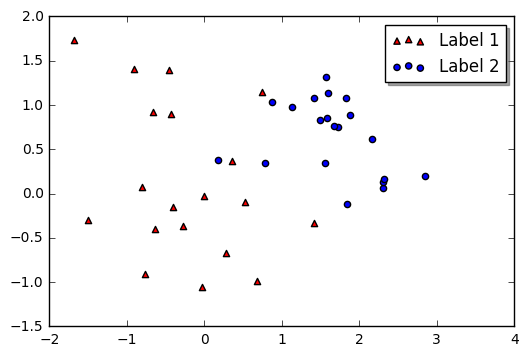

In [123]:
# Problem 2: PCA - Question 4
data_Agg_Square = np.hstack((data_Agg,np.zeros(shape=(40,37))))

eigen = (np.linalg.eig(cov))
eigenValues = eigen[0]
eigenVectors = eigen[1]
topTwo = np.zeros((2,3))
topTwo[0] = np.argmax(eigenValues)
eigenValues[np.argmax(eigenValues)] = -10
topTwo[1] = np.argmax(eigenValues)

topTwo[0] = eigenVectors[int(topTwo[0][0])]
topTwo[1] = eigenVectors[int(topTwo[1][0])]

finalData = data_Agg.dot(topTwo.transpose())


plt.scatter(finalData[0:19,0], finalData[0:19,1], c='r', marker='^', label="Label 1")

plt.scatter(finalData[20:,0], finalData[20:,1], c='b', marker='o', label="Label 2")
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
legend = plt.legend(loc='upper right', shadow=True)
plt.show()



In [4]:
# Problem 3: Low Rank Approximation of Mona Lisa (Connor)

In [3]:
# Problem 4: Starting in Kaggle (Michael)
# Kaggle username: MSpearing
# The code in this module is copied from: 
# https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models

# Trying our a linear model
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

%config InlineBackend.figure_format = 'png' # 'retina' #set 'png' here when working on notebook
%matplotlib inline

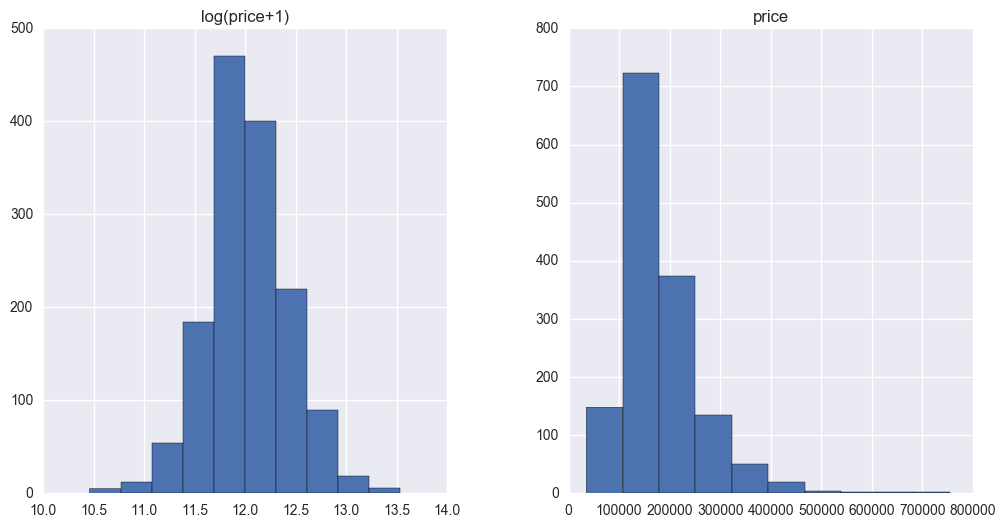

In [4]:
# Problem 4: Starting in Kaggle (Michael)
# The code in this module is copied from: 
# https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models

train = pd.read_csv("./input/train.csv")
test = pd.read_csv("./input/test.csv")
train.head()
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],test.loc[:,'MSSubClass': 'SaleCondition']))

# Preprocessing the data
matplotlib.rcParams['figure.figsize'] = (12.0,6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price+1)":np.log1p(train["SalePrice"])})
prices.hist()

train["SalePrice"] = np.log1p(train["SalePrice"])

numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna()))
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

all_data = pd.get_dummies(all_data)

#filling NA's with the mean of the column
all_data = all_data.fillna(all_data.mean())

# Creating matrices for sklearn
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

In [28]:
# Problem 4: Starting in Kaggle (Michael)
# Run a ridge Regression using alpha = 0.1
# Make a submission of this prediction
from sklearn.linear_model import Ridge
from sklearn.cross_validation import cross_val_score
alpha = 0.1
# Run the ridge regression 5 times and cross validate
ridge = np.sqrt(-cross_val_score(Ridge(alpha=alpha),X_train, y, scoring = "mean_squared_error", cv=5))

# Take the mean of the 5 samples
ridge = ridge.mean()
print("RMSE with alpha = " + str(alpha) + " is: " + str(ridge))

RMSE with alpha = 0.1 is: 0.137775382772


0.12733734668670743

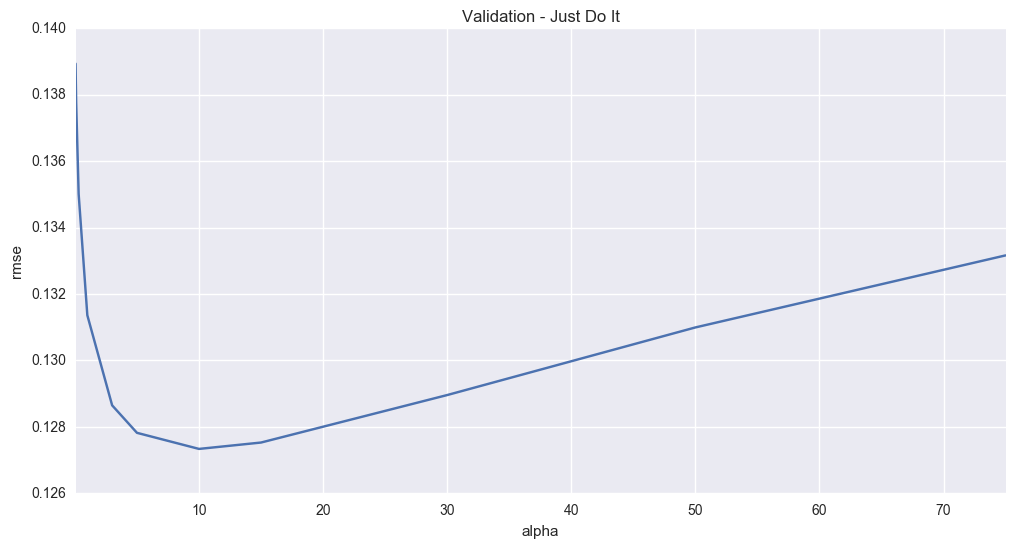

In [33]:
# The code in this module is copied from: 
# https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models
# Models
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.cross_validation import cross_val_score

def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y, scoring="mean_squared_error", cv = 5))
    return(rmse)

model_ridge = Ridge()

alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]

cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

cv_ridge.min()

Lasso RMSE: 0.12314421091
Lasso picked 110 variables and eliminated the other 178 variables


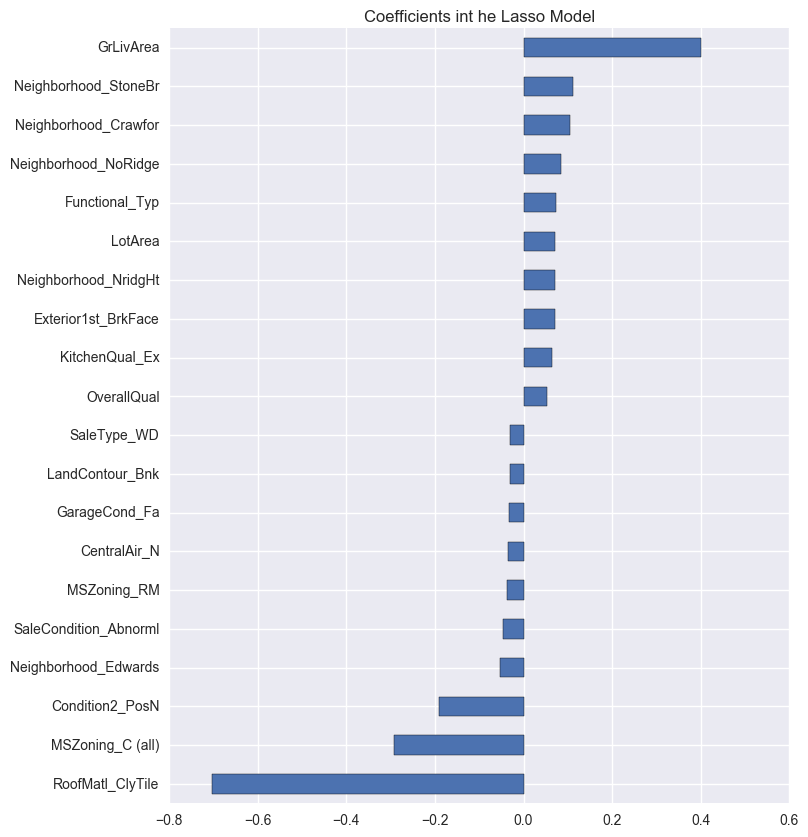

In [42]:
# The code in this module is copied from: 
# https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models

# Now we will apply a Lasso Model
# Alphas in Lasso are inverse of those in Ridge
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train,y)
print("Lasso RMSE: " + str(rmse_cv(model_lasso).mean()))
# Lasso will pick variables to keep and discard those it deems unimportant
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " + str(sum( coef ==0)) + " variables")
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
matplotlib.rcParams['figure.figsize' ] = (8.0, 10.0)
imp_coef.plot(kind = 'barh')
plt.title("Coefficients int he Lasso Model")
plt.show()

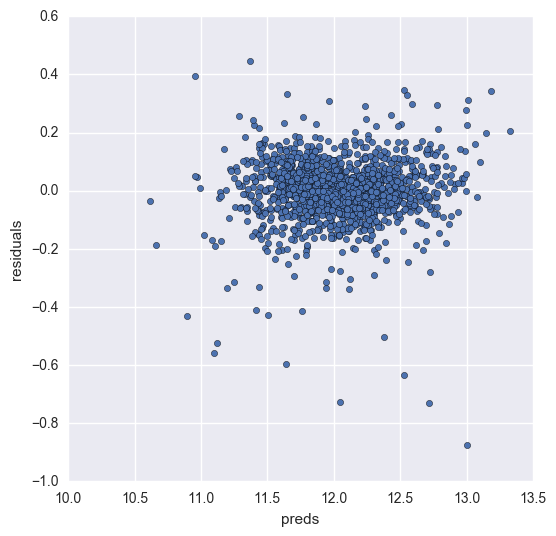

In [44]:
# Lets look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0,6.0)
preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals", kind = "scatter")